# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [4]:
apple = df

### Step 4.  Check out the type of the columns

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [6]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [7]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [8]:
apple.groupby("Date").count()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,1,1,1,1,1,1
1980-12-15,1,1,1,1,1,1
1980-12-16,1,1,1,1,1,1
1980-12-17,1,1,1,1,1,1
1980-12-18,1,1,1,1,1,1
...,...,...,...,...,...,...
2014-07-01,1,1,1,1,1,1
2014-07-02,1,1,1,1,1,1
2014-07-03,1,1,1,1,1,1


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [ ]:
apple.sort_index(ascending = False)

### Step 9. Get the last business day of each month

In [13]:
import calendar
def last_business_day_in_month(year: int, month: int) -> int:
    return max(calendar.monthcalendar(year, month)[-1:][0][:5])
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [17]:
(apple.index.max()-apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [23]:
month_year = (df['Date'].dt.to_period('M'))
month_year = pd.DataFrame(month_year)
month_year = month_year.groupby("Date").count()
len(month_year)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<AxesSubplot:xlabel='Date'>

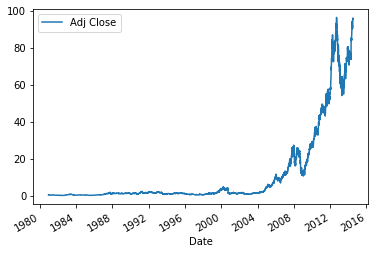

In [30]:
df.plot.line(y="Adj Close", x="Date")

### BONUS: Create your own question and answer it.